# Reshaping Exercises

<span style="color: #008080">*Jiechen Li*</span>

Before diving into actually doing some exercises, a few notes about reshaping in `pandas`. 

**So many tools:** As is so often the case with `pandas`, when there are multiple ways that something can be done, `pandas` implements all of them, even it if results in a lot of duplication of funcationality. As a result, there are several sets of methods that do very similar things, and which can be hard to keep straights: 

- `melt` and `pivot`: Tools for moving a dataset from long-to-wide (`pivot`) or wide-to-long (`melt`).
- `pivot_table`: Like `pivot`, but allows you to do aggregations during the reshape if you want.
- `stack` and `unstack`: Like `melt` and `pivot`, but only for use when your variables are stored in indices. I don't use these much. 

Personally, **I find melt and pivot most useful.** `pivot_table` *can* do aggregations during the reshape, but you can always do aggregations yourself using `groupby`. :) 

Also, I have to go look at [these pictures](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)... every time I reshape. Don't hesistate to look them up for help!

**What SHOULD I want my data to look like?** Just a reminder that a natural question to ask is "in what format should I want my data?" Obviously this question is subjective, but as you read in the Hadley Wickham [piece I assigned](http://vita.had.co.nz/papers/tidy-data.html), this is a good standard definition for a "tidy" dataset to which we might aspire: 

1. Each variable forms a column.
2. Each observation forms a row.
3. Each type of observational unit forms a table.

In general, I'm a big fan of this approach, and I think it's a good one to use (especially numbers 1 and 2).

Note that the question of what forms an "observation" depends on the analysis you plan to run (which depends on the answer you seek to ask! See! EVERYTHING ALWAYS COMES BACK TO THE QUESTION YOU ARE SEEKING TO ANSWER!). Suppose you have data on GDP from different countries for many years. If you plan to run a panel analysis where each observation is a country-year, then each row should be a country-year. But if you plan to do a country-level analysis using measures of, say, GDP variation over time, then each row should be a country!



## Exercises!

So in this exercise, we're going to work with data from the World Development Indicators. Unlike in previous exercises, however, where I cleaned up the data before giving it to you, we'll be working with the raw data just as you would get it from the World Bank download site. 


## Gradescope Autograding

Please follow [all standard guidance](https://www.practicaldatascience.org/html/autograder_guidelines.html) for submitting this assignment to the Gradescope autograder, including storing your solutions in a dictionary called `results` and ensuring your notebook runs from the start to completion without any errors.

For this assignment, please name your file `exercise_reshaping.ipynb` before uploading.

You can check that you have answers for all questions in your `results` dictionary with this code:

```python
assert set(results.keys()) == {
    "ex2_num_rows",
    "ex4_num_rows",
    "ex5_num_countries",
    "ex6_relationship",
    "ex7_relationship",
    "ex8_countries_in_panel",
    "ex10_demeaned_corr",
}
```


### Submission Limits

Please remember that you are **only allowed three submissions to the autograder.** Your last submission (if you submit 3 or fewer times), or your third submission (if you submit more than 3 times) will determine your grade Submissions that error out will **not** count against this total.

### Exercise 1

Import the data using a link from [here](https://github.com/nickeubank/MIDS_Data/blob/master/World_Development_Indicators/raw_WDI_Data_csv.zip) and load it into pandas without unzipping it (did you know pandas will read zip files directly?!).

<span style="color: #008080">**Yes, I knew it from your notes here!**

In [139]:
import pandas as pd

pd.set_option("mode.copy_on_write", True)


data_1 = "https://github.com/nickeubank/MIDS_Data/raw/master/World_Development_Indicators/raw_WDI_Data_csv.zip"

WDI = pd.read_csv(data_1)


print("Loading the country-level data on GDP from 1960 to 2018:")
WDI.sample(5)

Loading the country-level data on GDP from 1960 to 2018:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
366129,St. Kitts and Nevis,KNA,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416006,West Bank and Gaza,PSE,Coverage of social insurance programs in 2nd q...,per_si_allsi.cov_q2_tot,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337775,San Marino,SMR,"Educational attainment, at least Master's or e...",SE.TER.CUAT.MS.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197994,Greece,GRC,"Railways, passengers carried (million passenge...",IS.RRS.PASG.KM,NaN,NaN,NaN,NaN,NaN,NaN,...,1414.0,9.579690e+02,851.34,7.743860e+02,NaN,NaN,NaN,NaN,NaN,NaN
335146,Rwanda,RWA,"Net official flows from UN agencies, IFAD (cur...",DT.NFL.IFAD.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,10340000.0,1.282000e+07,18180000.00,1.486000e+07,16880000.0,9080000.0,11510000.0,17320000.0,NaN,NaN


In [140]:
WDI.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'Unnamed: 63'],
      dtype='object')

### Exercise 2

In this exercise, we'd like to look at the relationship between GDP and inequality across countries. So before anything else, thin down your dataset by getting only the rows related to:

- GDP per capita (in Constant US Dollars -- the "constant" means values are have been adjusted for inflation, so values from 1970 can be directly compared with 2010)
- Gini coefficient
- Information on income shares (what percentage of total income goes to X% of the income distribution). **There are 7 of these in total.**

Store the number of rows you get from this updated dataset in `"ex2_num_rows"`.

**NOTE:** this is non-trivial. This is a big dataset with LOTS of variables, so you'll have to use your data wrangling skills to see all the variables names. Remember that if you want to see all the entries in something but python compresses it (so it doesn't take up too much space), you can loop over it and print each item separately to make it show everything!

**NOTE 2:** If you _do_ print out all the variable names, please comment out the code before you submit your notebook so graders don't end up swimming in print-outs. 

In [141]:
# WDI["Indicator Name"].unique

In [142]:
# WDI.shape

In [143]:
mask_1 = WDI["Indicator Name"].str.contains("GDP per capita", case=False, na=False)
filtered_WDI_1 = WDI[mask_1]
GDP_Words = filtered_WDI_1["Indicator Name"].unique()[0]

mask_2 = WDI["Indicator Name"].str.contains("Gini", case=False, na=False)
filtered_WDI_2 = WDI[mask_2]
Gini_Words = filtered_WDI_2["Indicator Name"].unique()[0]

mask_3 = WDI["Indicator Name"].str.contains("Income share", case=False, na=False)
filtered_WDI_3 = WDI[mask_3]
Income_Share_Words = filtered_WDI_3["Indicator Name"].unique().tolist()

combined_list = [GDP_Words, Gini_Words] + Income_Share_Words


results = {}

WDI_new = WDI[WDI["Indicator Name"].isin(combined_list)]
ex2_num_rows = WDI_new.shape[0]
results["ex2_num_rows"] = ex2_num_rows

print(
    f"The related rows of GDP per capita, Gini coefficient and income shareare {(ex2_num_rows):}."
)
WDI_new

The related rows of GDP per capita, Gini coefficient and income shareare 2376.


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
520,Arab World,ARB,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5945.678558,6021.163952,6278.734889,6336.581939,6354.885748,6430.464609,6507.882895,6447.294731,6458.734486,NaN
540,Arab World,ARB,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
655,Arab World,ARB,Income share held by fourth 20%,SI.DST.04TH.20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
656,Arab World,ARB,Income share held by highest 10%,SI.DST.10TH.10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
657,Arab World,ARB,Income share held by highest 20%,SI.DST.05TH.20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421194,Zimbabwe,ZWE,Income share held by highest 20%,SI.DST.05TH.20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,49.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421195,Zimbabwe,ZWE,Income share held by lowest 10%,SI.DST.FRST.10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421196,Zimbabwe,ZWE,Income share held by lowest 20%,SI.DST.FRST.20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421197,Zimbabwe,ZWE,Income share held by second 20%,SI.DST.02ND.20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
# type(GDP_Words)

### Exercise 3

OK, that makes our data a lot more manageable, but it's still pretty heinous.

In our analysis, we know that we'll want to have country-years as our units of observation, so let's start reshaping. Come up with a strategy that gets our inequality variables as columns, and makes each of our future observations (i.e. each country-year) a row. 

*Hint:* It can sometimes be helpful to drop useless columns before a reshape.

*Other hint:* Sometimes you will end up with your column names stored in a hierarchical (multi-level) `.column` object structure. As with hierarchical indices for rows, they’re a pain. (Whether this occurs depends on the exact syntax you use, so you may or may not get it).

The two easy ways to fix these hierarchical `.column` objects are:

- Just drop a level: df.columns.drop_level(0)` where 0 is which level you want to drop.
- Directly manipulate the column names by doing something to the df.columns object and re-assigning to df.columns. For example, you can just concatenate two columns levels (they're stored as tuples) with a dash between them with `df.columns = map(lambda x: str(x[0]) + "-" + str(x[1]), df.columns)`.

In [145]:
drop_cols = ["Country Code", "Indicator Code", "Unnamed: 63"]
WDI_new.drop(drop_cols, axis=1, inplace=True)
# WDI_new

# reshape the WDI_new dataset to create a index of year
WDI_new_melt = WDI_new.melt(
    id_vars=["Country Name", "Indicator Name"], var_name="Year", value_name="value"
)
# WDI_thin_melt

# pivot
WDI_new_pivot = WDI_new_melt.pivot(
    index=["Country Name", "Year"], columns="Indicator Name", values="value"
).reset_index()
WDI_new_pivot

Indicator Name,Country Name,Year,GDP per capita (constant 2010 US$),GINI index (World Bank estimate),Income share held by fourth 20%,Income share held by highest 10%,Income share held by highest 20%,Income share held by lowest 10%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%
0,Afghanistan,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15571,Zimbabwe,2014,1232.864865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15572,Zimbabwe,2015,1234.103352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15573,Zimbabwe,2016,1224.309922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15574,Zimbabwe,2017,1263.321322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exercise 4

Now that you've done your reshapes, subset for observations that are post-1980. Store the number of rows in your reshaped data with only data from the years after 1980 in `"ex4_num_rows"`.

In [146]:
WDI_new_pivot = WDI_new_pivot.reset_index(drop=True)
WDI_new_pivot["Year"] = pd.to_numeric(WDI_new_pivot["Year"])
WDI_after_1980 = WDI_new_pivot[WDI_new_pivot["Year"] > 1980]

ex4_num_rows = WDI_after_1980.shape[0]
results["ex4_num_rows"] = ex4_num_rows
# results

### Exercise 5

Subset for observations for which we have GINI index estimates. How many unique *countries* do you end up with? Store this answer in `ex5_num_countries`.

In [147]:
# Gini_Words

In [148]:
# reset the index of WDI_after_1980 with inplace=True
WDI_after_1980.reset_index(drop=True, inplace=True)

# mask for non-null GINI index values
mask_gini_not_null = WDI_after_1980["GINI index (World Bank estimate)"].notna()

# apply the mask to the df to filter out rows where GINI index is not null
WDI_with_Gini = WDI_after_1980[mask_gini_not_null]

ex5_num_countries = WDI_with_Gini["Country Name"].nunique()
results["ex5_num_countries"] = ex5_num_countries
# results

### Exercise 6

Plot the relationship between **log** GDP per capita and Gini scores for all country years and add a linear fit as well. Is higher inequality associated with higher log GDP? Store your answer (as `"yes"` or `"no"`) in `results` under the key `"ex6_relationship"`.

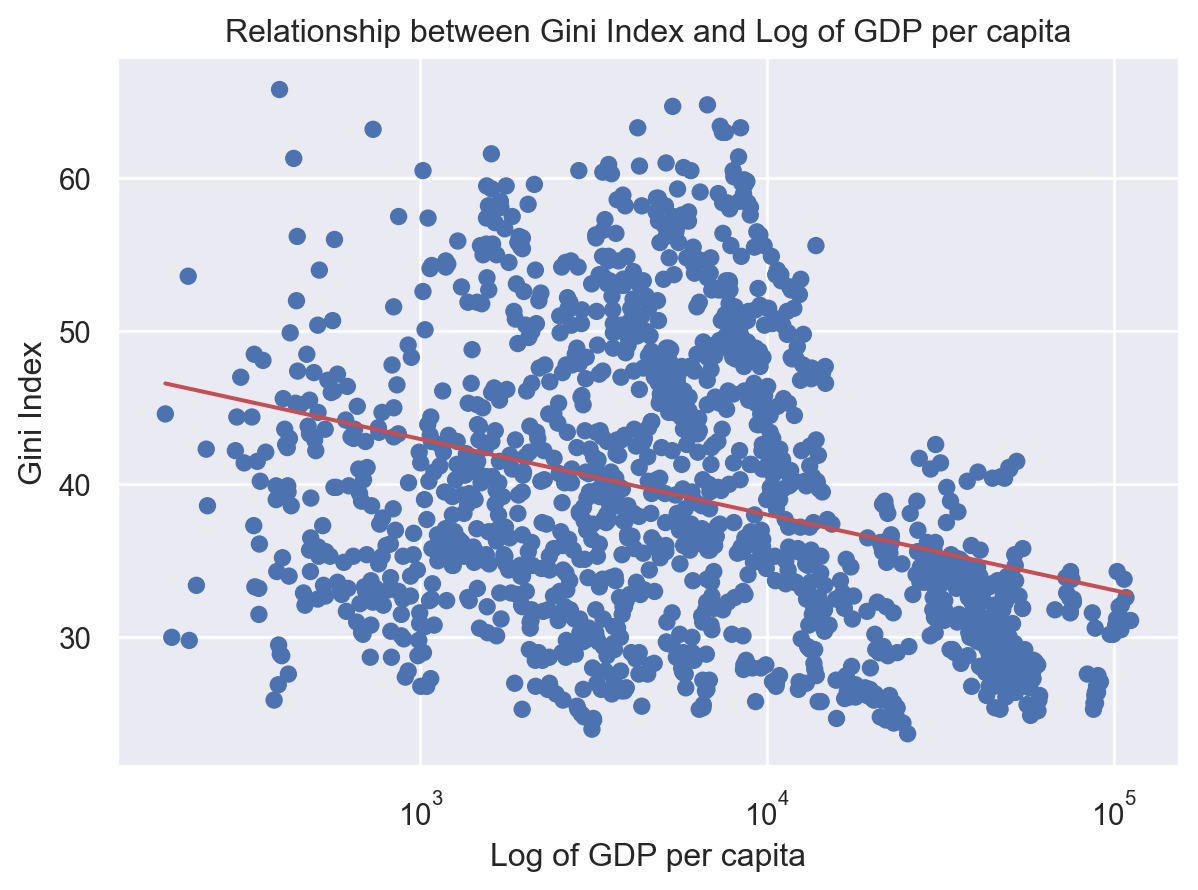

In [149]:
import seaborn.objects as so
import warnings

warnings.filterwarnings("ignore")

log_plot = so.Plot(
    WDI_with_Gini,
    x="GDP per capita (constant 2010 US$)",
    y="GINI index (World Bank estimate)",
)

log_plot.add(so.Dot()).scale(x="log").add(so.Line(color="r"), so.PolyFit(1)).label(
    x="Log of GDP per capita",
    y="Gini Index",
    title="Relationship between Gini Index and Log of GDP per capita",
)

In [150]:
results["ex6_relationship"] = "no"

### Exercise 7

It's important to not always rely too much on a single measure of something like inequality. To check the robustness of our result, let's be sure to also look at the relationship between inequality and income by using the income share of the richest 10% instead of just the Gini coefficient. Plot that relationship.

Do you also find that income inequality (as measured by the share of income accruing to the top 10% of earners) is positively or negatively correlated with gdp per capita? Store your answer in your `results` dict under the key `"ex7_relationship"` as the string `"positively correlated"` or the string `"negatively correlated"`.

In [151]:
# Income_Share_Words

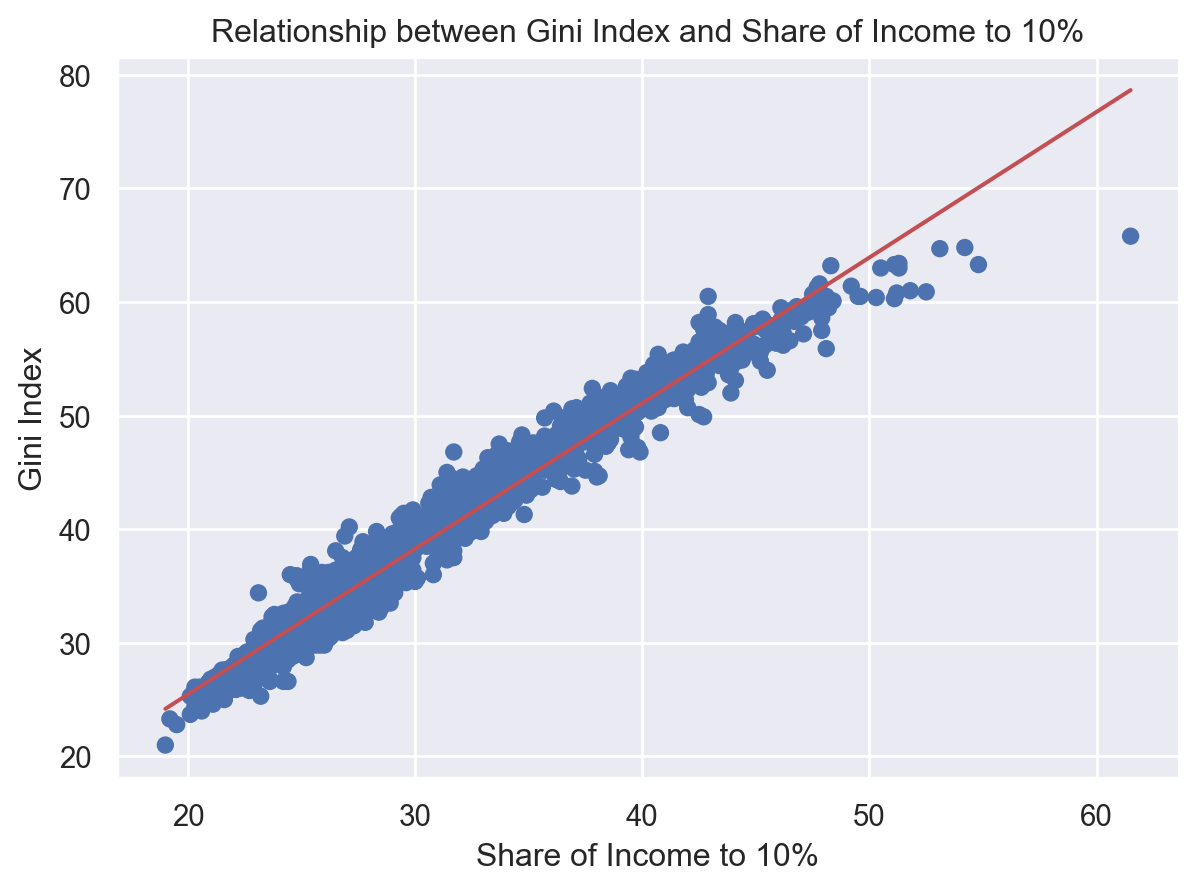

In [152]:
inequality_plot = so.Plot(
    WDI_with_Gini,
    x="Income share held by highest 10%",
    y="GINI index (World Bank estimate)",
)

inequality_plot.add(so.Dot()).add(so.Line(color="r"), so.PolyFit(1)).label(
    x="Share of Income to 10%",
    y="Gini Index",
    title="Relationship between Gini Index and Share of Income to 10%",
)

In [153]:
results["ex7_relationship"] = "negatively correlated"

### Exercise 8

This analysis has allowed us to evaluate whether richer countries tend to have greater income inequality, but it certainly has not established whether we should expect that as countries become wealthier, their income distribution will also become more even. In other words, we have established a correlation between income inequality and wealth, but we certainly have not established a causal relationship between wealth and income inequality.

One way we might be able to get better traction on this question is to look at whether, as individual countries become wealthier, their income distribution also becomes more even.

To answer this question, let's begin by subsetting our data to the years 2005 to 2015 (inclusive)—the period in which the largest number of countries in our data have inequality data. Then also subset for the set of countries with Gini data for all years in this period. This gives us what's called a *balanced panel*—a dataset in which we have data on entities *at a number of different points in time* (a panel dataset) and where at every point in time, we have data for the *same set of entities* (a balanced panel dataset). 

Balanced panels are very desirable because the fact that they contain the same entities at all moments in time means that any changes we measure over time are the result of real changes in the outcomes we care about and *not* the result of changes in the composition of our sample.

Store the number of countries still in your data in `"ex8_countries_in_panel"`.

In [154]:
# mask 2005-2015
year_mask = (WDI_with_Gini["Year"] >= 2005) & (WDI_with_Gini["Year"] <= 2015)

# use mask to balanced panel
WDI_balanced_panel_gini = WDI_with_Gini[year_mask]

gini_country_counts = WDI_balanced_panel_gini.groupby("Country Name")[
    "GINI index (World Bank estimate)"
].count()

# list of countries with 11 years of GINI
countries_with_full_data = gini_country_counts[gini_country_counts == 11].index.tolist()

num_countries_in_panel = len(countries_with_full_data)

# only include these countries
WDI_balanced_panel_gini_filtered = WDI_balanced_panel_gini[
    WDI_balanced_panel_gini["Country Name"].isin(countries_with_full_data)
].reset_index(drop=True)

# print(WDI_balanced_panel_gini_filtered)

results["ex8_countries_in_panel"] = num_countries_in_panel
results

{'ex2_num_rows': 2376,
 'ex4_num_rows': 10032,
 'ex5_num_countries': 164,
 'ex6_relationship': 'no',
 'ex7_relationship': 'negatively correlated',
 'ex8_countries_in_panel': 42}

### Exercise 9

Now, demean both Gini coefficient scores and log GDP per capita for all countries. In other words, for each country, calculate that country's average Gini score over this period and subtract that average from all of the country's Gini scores, then do the same for log GDP per capita. Then plot these countries' *demeaned* Gini scores against demeaned log GDP per capita.

Essentially, this is a way of looking at whether, when countries are richer than their average during this period, they have more equal income distributions than on average.

In [155]:
import numpy as np


# log GDP per capita
WDI_balanced_panel_gini_filtered["log GDP per capita"] = np.log(
    WDI_balanced_panel_gini_filtered["GDP per capita (constant 2010 US$)"]
)

# mean log GDP per capita for each country
WDI_balanced_panel_gini_filtered["GDP mean"] = WDI_balanced_panel_gini_filtered.groupby(
    "Country Name", as_index=False
)[["log GDP per capita"]].transform("mean")

# demean the log GDP per capita by subtracting the country mean from each observation
WDI_balanced_panel_gini_filtered["GDP demean"] = (
    WDI_balanced_panel_gini_filtered["log GDP per capita"]
    - WDI_balanced_panel_gini_filtered["GDP mean"]
)


# same for GINI

WDI_balanced_panel_gini_filtered[
    "GINI mean"
] = WDI_balanced_panel_gini_filtered.groupby("Country Name", as_index=False)[
    ["GINI index (World Bank estimate)"]
].transform(
    "mean"
)


WDI_balanced_panel_gini_filtered["GINI demean"] = (
    WDI_balanced_panel_gini_filtered["GINI index (World Bank estimate)"]
    - WDI_balanced_panel_gini_filtered["GINI mean"]
)


WDI_balanced_panel_gini_filtered

Indicator Name,Country Name,Year,GDP per capita (constant 2010 US$),GINI index (World Bank estimate),Income share held by fourth 20%,Income share held by highest 10%,Income share held by highest 20%,Income share held by lowest 10%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%,log GDP per capita,GDP mean,GDP demean,GINI mean,GINI demean
0,Armenia,2005,2571.977128,36.0,20.2,30.8,44.7,3.3,8.1,11.8,15.2,7.852430,8.121420,-0.268989,30.690909,5.309091
1,Armenia,2006,2934.024882,29.7,22.1,24.5,38.8,3.7,8.9,13.1,17.0,7.984130,8.121420,-0.137289,30.690909,-0.990909
2,Armenia,2007,3366.664939,31.2,22.1,25.1,40.0,3.5,8.4,12.8,16.7,8.121678,8.121420,0.000258,30.690909,0.509091
3,Armenia,2008,3629.909091,29.2,22.4,23.7,38.4,3.9,9.1,13.1,17.0,8.196963,8.121420,0.075543,30.690909,-1.490909
4,Armenia,2009,3137.346098,28.0,22.4,22.9,37.5,4.0,9.4,13.5,17.2,8.051133,8.121420,-0.070287,30.690909,-2.690909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,United Kingdom,2011,39413.323879,33.2,22.8,25.3,40.7,2.9,7.4,12.2,16.8,10.581859,10.601617,-0.019758,33.936364,-0.736364
458,United Kingdom,2012,39706.610083,32.3,23.1,24.6,40.0,3.1,7.6,12.3,17.0,10.589273,10.601617,-0.012345,33.936364,-1.636364
459,United Kingdom,2013,40248.743195,33.2,23.1,25.3,40.5,2.9,7.4,12.2,16.9,10.602834,10.601617,0.001217,33.936364,-0.736364
460,United Kingdom,2014,41124.121650,34.0,22.9,26.1,41.2,2.9,7.3,12.0,16.6,10.624350,10.601617,0.022733,33.936364,0.063636


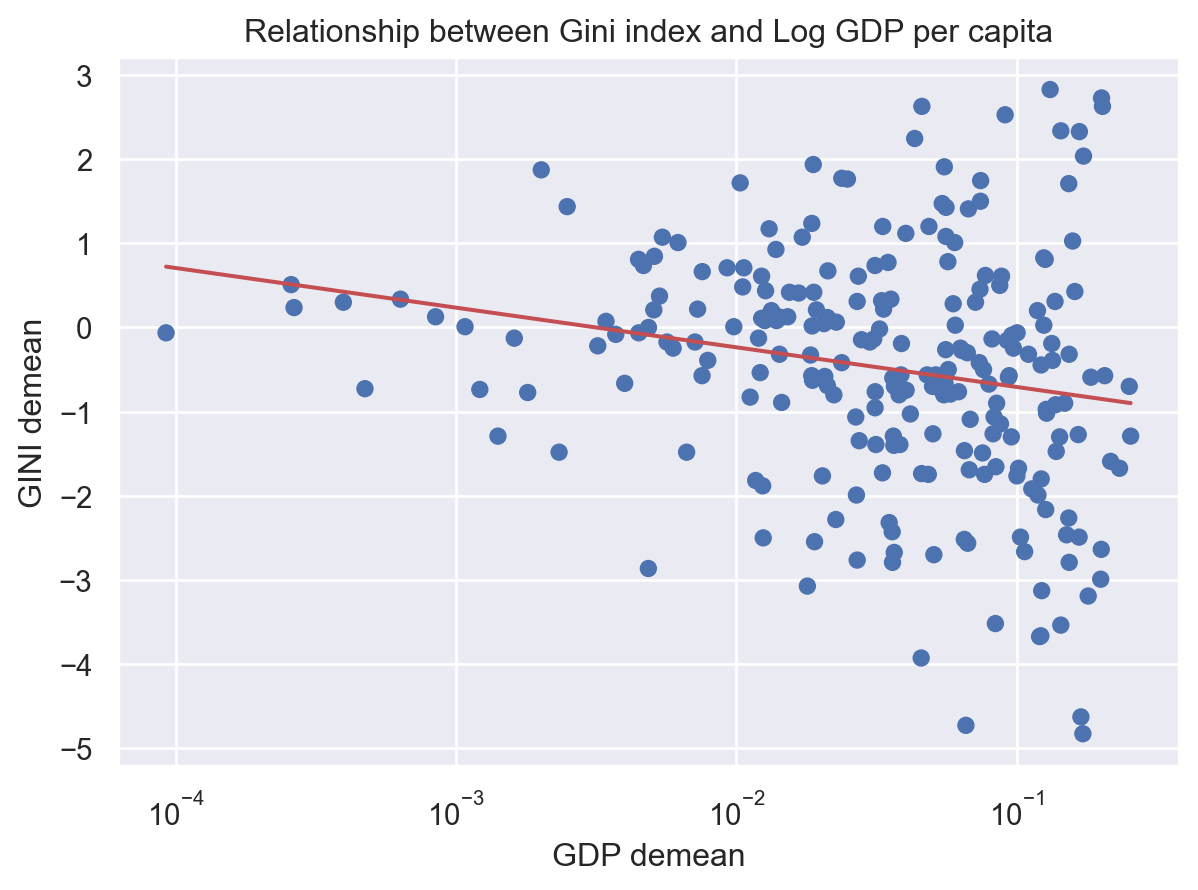

In [156]:
so.Plot(
    WDI_balanced_panel_gini_filtered,
    x="GDP demean",
    y="GINI demean",
).add(
    so.Dot()
).scale(x="log").add(so.Line(color="r"), so.PolyFit(1)).label(
    x="GDP demean",
    y="GINI demean",
    title="Relationship between Gini index and Log GDP per capita",
)

### Exercise 10 

Calculate the correlation between these two demand outcomes in our balanced panel and store the result in `"ex10_demeaned_corr"`.

In [157]:
results["ex10_demeaned_corr"] = (
    WDI_balanced_panel_gini_filtered[["GDP demean", "GINI demean"]].corr().iloc[0, 1]
)

In [158]:
results

{'ex2_num_rows': 2376,
 'ex4_num_rows': 10032,
 'ex5_num_countries': 164,
 'ex6_relationship': 'no',
 'ex7_relationship': 'negatively correlated',
 'ex8_countries_in_panel': 42,
 'ex10_demeaned_corr': -0.38991235183325706}

In [159]:
assert set(results.keys()) == {
    "ex2_num_rows",
    "ex4_num_rows",
    "ex5_num_countries",
    "ex6_relationship",
    "ex7_relationship",
    "ex8_countries_in_panel",
    "ex10_demeaned_corr",
}